In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import scipy.stats as st
import matplotlib.pyplot as plt

#  Import and read our cleaned data.
import pandas as pd
url = "https://raw.githubusercontent.com/natbiorg/project_4/refs/heads/main/Starter_Code/Resources/cleaned.csv"
data_df = pd.read_csv(url)
data_df.head()


,Customer_ID,Gender,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Average_Price,...,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_Percentage,Near_Holiday,State,Total_Sales,Total_Cost,Average_Saved($)
0,17850.0,M,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
1,17850.0,M,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
2,17850.0,M,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest Smart Devices,2.0,122.77,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,245.54,227.486,12.277
3,17850.0,M,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Smart Devices,1.0,81.50,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,81.50,79.850,8.150
4,17850.0,M,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371


In [31]:
data_df.columns

Index(['Customer_ID', 'Gender', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Average_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Offline_Spend', 'Online_Spend', 'Month',
       'Coupon_Code', 'Discount_Percentage', 'Near_Holiday', 'State',
       'Total_Sales', 'Total_Cost', 'Average_Saved($)'],
      dtype='object')

In [32]:
data_df.nunique()

Customer_ID             1469
Gender                     2
Tenure_Months             50
Transaction_ID         25062
Transaction_Date         365
Product_SKU             1145
Product_Description      404
Product_Category          13
Quantity                 152
Average_Price            547
Delivery_Charges         268
Coupon_Status              3
GST                        5
Offline_Spend             12
Online_Spend             366
Month                     12
Coupon_Code               48
Discount_Percentage        4
Near_Holiday              12
State                      5
Total_Sales             2673
Total_Cost              9415
Average_Saved($)         950
dtype: int64

In [33]:
data_df = data_df.drop(['Customer_ID', 'Transaction_ID', 'Product_SKU', 'Product_Description', 'Coupon_Code'], axis=1)

In [34]:
data_df['Transaction_Date'] = pd.to_datetime(data_df['Transaction_Date'])
data_df['Transaction_Date_Ordinal'] = data_df['Transaction_Date'].apply(lambda date: date.toordinal())
data_df.drop(['Transaction_Date'], axis=1, inplace=True)

In [35]:
data_df.dtypes
# To dummy Gender, Product_Category, Coupon_Status, Near_Holiday, State
# Convert Transaction Date to date type

Gender                       object
Tenure_Months               float64
Product_Category             object
Quantity                    float64
Average_Price               float64
Delivery_Charges            float64
Coupon_Status                object
GST                         float64
Offline_Spend               float64
Online_Spend                float64
Month                         int64
Discount_Percentage         float64
Near_Holiday                 object
State                        object
Total_Sales                 float64
Total_Cost                  float64
Average_Saved($)            float64
Transaction_Date_Ordinal      int64
dtype: object

In [36]:
data_cat =  data_df.dtypes[data_df.dtypes == "object"].index.tolist()
enc = OneHotEncoder(sparse_output=False)

encode_df = pd.DataFrame(enc.fit_transform(data_df[data_cat]))

encode_df.columns = enc.get_feature_names_out()

data_df = data_df.merge(encode_df,left_index=True, right_index=True)
data_df = data_df.drop(data_cat, axis=1)
data_df.head()

,Tenure_Months,Quantity,Average_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_Percentage,Total_Sales,...,Near_Holiday_New Year's Day,Near_Holiday_Thanksgiving Day,Near_Holiday_Veterans Day,Near_Holiday_Washington's Birthday,Near_Holiday_nan,State_California,State_Illinois,State_New Jersey,State_New York,State_Washington DC
0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12.0,2.0,122.77,6.5,0.1,4500.0,2424.5,1,10.0,245.54,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12.0,1.0,81.50,6.5,0.1,4500.0,2424.5,1,10.0,81.50,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,1,10.0,153.71,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
y = data_df['Total_Cost']
X = data_df.drop(['Total_Cost'], axis =1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [98]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 48
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 80)                  │           3,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,481 (40.94 KB)

 Trainable params: 10,481 (40.94 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [101]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 113.2589 - mae: 4.4298
Epoch 2/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.2721 - mae: 3.7397
Epoch 3/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 70.1782 - mae: 3.3887
Epoch 4/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 148.3096 - mae: 4.5646
Epoch 5/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 257.8421 - mae: 4.2122
Epoch 6/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.4647 - mae: 2.7679
Epoch 7/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 90.0155 - mae: 3.6695
Epoch 8/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27.5509 - mae: 2.4124
Epoch 9/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 86.9265 - mae: 3.4208
Epoch 10/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 87.3640 - mae: 3.1114
Epoch 11/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 28.5324 - mae: 2.2283
Epoch 12/50
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 36.7664 

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Mean Absolute Error: {model_accuracy}")

414/414 - 1s - 1ms/step - loss: 94.9049 - mae: 4.7815
Loss: 94.90485382080078, Accuracy: 4.781548500061035


In [45]:
#define variables
y = data_df['Total_Sales']  # Dependent variable: Total Sales
x = data_df['Total_Cost']   # Independent variable: Total Cost

In [46]:
# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

In [47]:
# Creating the regression line
regression_line = slope * x + intercept

Slope: 1.162252797617822
Intercept: -6.083320044623505
R-squared: 0.9694009116123096
Standard Error: 0.0008973416946629516


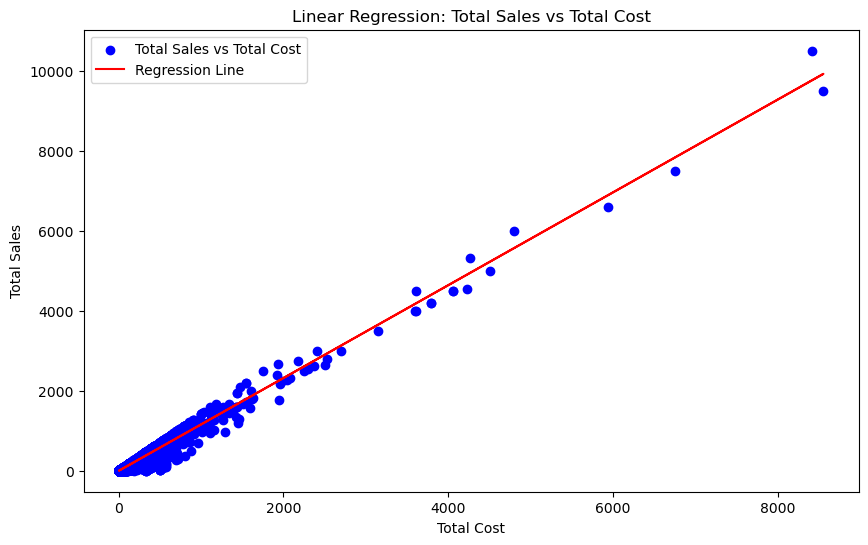

In [48]:
# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Total Sales vs Total Cost')  # Scatter plot of data points
plt.plot(x, regression_line, color='red', label='Regression Line')  # Regression line
plt.xlabel('Total Cost')  # X-axis label
plt.ylabel('Total Sales')  # Y-axis label
plt.title('Linear Regression: Total Sales vs Total Cost')  # Title of the plot
plt.legend()

# Print the results
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared:', r_value**2)  # R-squared: Proportion of variance explained by the model
print('Standard Error:', std_err)